In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from collections import Counter
from unidecode import unidecode
from tqdm.notebook import tqdm

In [2]:
df_PER_gender = pd.read_csv(r'../../literary_gender_trouble-main/results/df_PER_gender_dated.csv')

In [3]:
df_PER_gender.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
results = pd.read_csv(r'../../literary_gender_trouble-main/results/prediction_all_proba_doc2vec.csv', encoding='utf_8')

In [5]:
results.set_index(['index'], inplace=True)

In [6]:
def retrieve_list_date(df_PER_gender, list_PER):
    list_date = []
    #list_per = [unidecode(elem) for elem in list(df_PER_gender.character)]
    
    for per in tqdm(list_PER):

        if per in list(df_PER_gender.character):
            row = df_PER_gender.loc[(df_PER_gender['character']==per)]
            list_date.append(int(row['date'].values[0]))
        else:
            print(per)

    return list_date

In [7]:
list_date = retrieve_list_date(df_PER_gender, list(results.index))

  0%|          | 0/27586 [00:00<?, ?it/s]

In [8]:
results['date']=list_date

In [9]:
sns.set_palette('bright')
sns.set_context("talk")
sns.set_style("darkgrid")

In [10]:
def retrieve_list_gender_AUTHOR(df_PER_gender, list_PER):
    list_gender_AUTHOR = []
    #list_per = [unidecode(elem) for elem in list(df_PER_gender.character)]
    
    for per in tqdm(list_PER):
        if per in list(df_PER_gender.character):
            row = df_PER_gender.loc[(df_PER_gender['character']==per)]
            list_gender_AUTHOR.append(row['gender_AUTHOR'].values[0])
        else:
            print(per)

    return list_gender_AUTHOR

In [11]:
gender_AUTHOR = retrieve_list_gender_AUTHOR(df_PER_gender, list(results.index))

  0%|          | 0/27586 [00:00<?, ?it/s]

In [15]:
len(gender_AUTHOR)

27586

In [16]:
results['gender_AUTHOR']=gender_AUTHOR

In [52]:
results_male = results[results['prediction']=='Male']

In [53]:
results_female = results[results['prediction']=='Female']

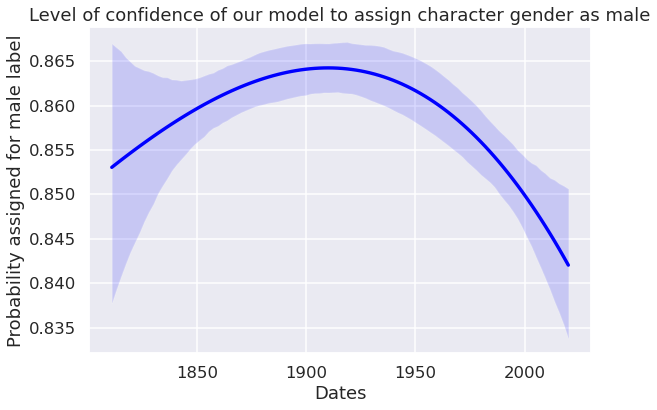

In [77]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.set_title('Level of confidence of our model to assign character gender as male')

#ax = sns.scatterplot(data=results, x='date', y='proba male', style="prediction")
#ax = sns.regplot(data=results, x='date', y='proba male', color='red', order=3, scatter=False, ax=ax)
ax = sns.regplot(data=results_male, x='date', y='proba female', color='blue', order=3, scatter=False, ax=ax)

ax.set_xlabel('Dates')
ax.set_ylabel('Probability assigned for male label')

plt.show()

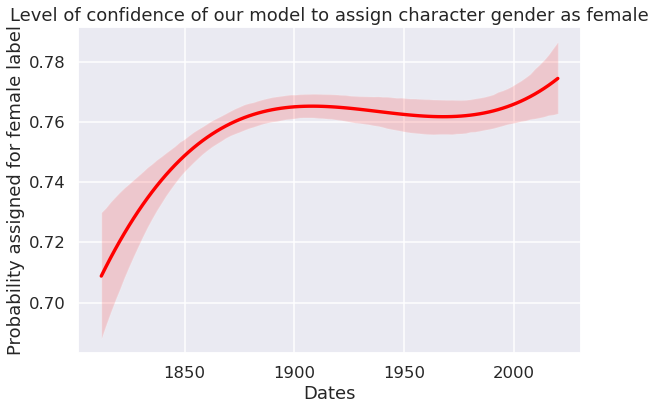

In [78]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.set_title('Level of confidence of our model to assign character gender as female')

ax = sns.regplot(data=results_female, x='date', y='proba male', color='red', order=3, scatter=False, ax=ax)

ax.set_xlabel('Dates')
ax.set_ylabel('Probability assigned for female label')

plt.show()

### SELECT PREDS == MALE

In [34]:
results_male = results[results['prediction']=='Male']

In [36]:
results_author_male_character_male = results_male[results_male['gender_AUTHOR']=='male']

In [40]:
results_author_female_character_male = results_male[results_male['gender_AUTHOR']=='female']

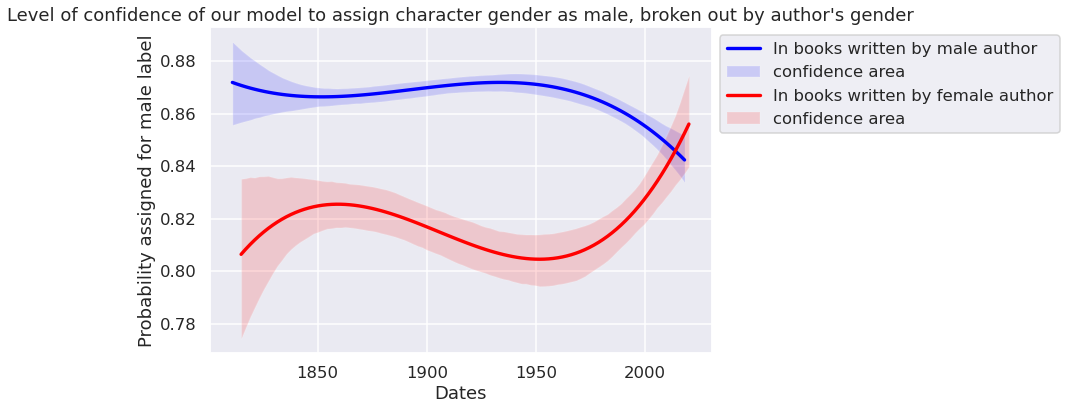

In [46]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.set_title("Level of confidence of our model to assign character gender as male, broken out by author's gender")

ax = sns.regplot(data=results_author_male_character_male, x='date', y='proba female', color='blue', order=3, scatter=False, ax=ax)
ax = sns.regplot(data=results_author_female_character_male, x='date', y='proba female', color='red', order=3, scatter=False, ax=ax)

plt.legend(labels=["In books written by male author", 'confidence area', 'In books written by female author', 'confidence area'], loc = 2, bbox_to_anchor = (1,1))

ax.set_xlabel('Dates')
ax.set_ylabel('Probability assigned for male label')

plt.show()

### SELECT PREDS == FEMALE

In [48]:
results_female = results[results['prediction']=='Female']
results_author_male_character_female = results_female[results_female['gender_AUTHOR']=='male']
results_author_female_character_female = results_female[results_female['gender_AUTHOR']=='female']

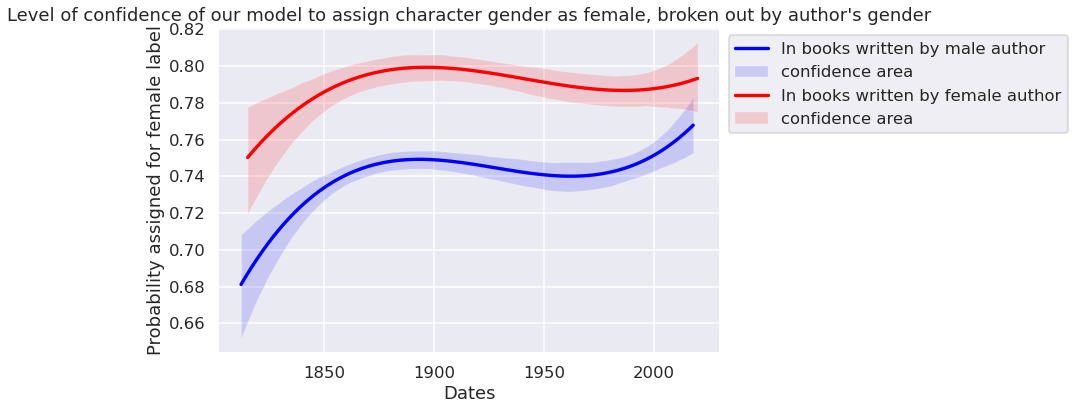

In [51]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.set_title("Level of confidence of our model to assign character gender as female, broken out by author's gender")

ax = sns.regplot(data=results_author_male_character_female, x='date', y='proba male', color='blue', order=3, scatter=False, ax=ax)
ax = sns.regplot(data=results_author_female_character_female, x='date', y='proba male', color='red', order=3, scatter=False, ax=ax)

plt.legend(labels=["In books written by male author", 'confidence area', 'In books written by female author', 'confidence area'], loc = 2, bbox_to_anchor = (1,1))

ax.set_xlabel('Dates')
ax.set_ylabel('Probability assigned for female label')

plt.show()